### Exploring the annotated data.

In [49]:
from datasets import load_dataset, disable_caching
import pandas as pd
import os
from tqdm.auto import tqdm

# can infer the generic loader script this easily
disable_caching()
# cache location [click](%userprofile%/.cache/huggingface/datasets)
# needs force_redownload to avoid loading incorrect cached stuff
shader20k_files = os.listdir("./data/annotated")
# print(shader20k_files)
shader20k_files = [f"./data/annotated/{f}" for f in shader20k_files if f.startswith("20k")]
# ds = load_dataset("json", data_dir="./data/annotated", download_mode="force_redownload", cache_dir=None)
ds = load_dataset("json", data_files=shader20k_files, download_mode="force_redownload", cache_dir=None)
# ds = load_dataset("json", data_dir="./data/annotated_test/", download_mode="force_redownload", cache_dir=None)
df = ds["train"].to_pandas()
# read "date" column as unix timestamp
df["date"] = pd.to_datetime(df["date"].astype(int), unit="s")
ds

Resolving data files:   0%|          | 0/95 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/19622 [00:00<?, ? examples/s]

PermissionError: [WinError 5] Zugriff verweigert: 'C:/Users/Jan/.cache/huggingface/datasets/json/default-1430a2fe1185e6f4/0.0.0/7483f22a71512872c377524b97484f6d20c275799bb9e7cd8fb3198178d8220a\\json-train.arrow'

In [ ]:
# fewer than 6k unique authors in shaders20k
df["author"].nunique()

NameError: name 'df' is not defined

In [ ]:
#redo the df

df = ds["train"].to_pandas()
# read "date" column as unix timestamp
df["date"] = pd.to_datetime(df["date"].astype(int), unit="s")
#

In [ ]:
df["test"].value_counts().head(10)

test
ok          11324
error        5014
timeout      3260
timedout       24
Name: count, dtype: int64

In [ ]:
# list of permissive licenses like: https://huggingface.co/datasets/bigcode/the-stack-v2/blob/main/license_stats.csv (gated?)
# maybe this instead: https://huggingface.co/datasets/bigcode/the-stack/blob/main/licenses.json
# seems to be the one they actually use: https://huggingface.co/datasets/bigcode-data/license_list/resolve/main/permissive_licenses.txt 

import requests
permissive_list = requests.get("https://huggingface.co/datasets/bigcode-data/license_list/resolve/main/permissive_licenses.txt").content.decode("utf-8").split()
permissive_list = [l.lower() for l in permissive_list]

print(len(permissive_list))

824


In [ ]:
# filtering down the dataset and keeping track of the numbers
print(ds["train"].unique("license"))
# filter permissive licenses
filtered_ds = ds["train"]
num_all = len(filtered_ds)
print(f"{num_all=}")
filtered_ds = filtered_ds.filter(lambda x: x["published"] == "Public API") # only take shaders published to the API
num_public_api = len(filtered_ds)
print(f"{num_public_api=}")
filtered_ds = filtered_ds.filter(lambda x: x["license"] in permissive_list + ["CC-BY-NC-SA-3.0"]) # permissive or base case(not actually permissive...) what about those AND and OR classifications?
num_permissive = len(filtered_ds)
print(f"{num_permissive=}")
filtered_ds = filtered_ds.filter(lambda x: x["test"] == "ok") # ok means it actually runs, valid was just that naga didn't error... but this also has issues
num_working = len(filtered_ds)
print(f"{num_working=}")
filtered_ds

['CC-BY-NC-SA-3.0', 'cc-by-nc-sa-3.0', 'bsd-new', 'mit', 'cc-by-4.0', 'proprietary-license', 'cc-by-nc-nd-3.0', 'bsd-simplified', 'cc0-1.0', 'unknown-license-reference', 'public-domain', 'apache-2.0', 'cc-by-nc-sa-4.0', 'agpl-3.0', 'cc-by-sa-3.0', 'cc-by-3.0', 'cc-by-sa-2.5', 'cc-by-sa-4.0', 'cc-by-sa-4.0 WITH generic-exception', 'cc-by-3.0 AND mit', 'cc-by-nc-sa-2.0', 'cc-by-nc-sa-3.0 AND proprietary-license', 'wtfpl-2.0', 'gpl-3.0', 'cc-by-4.0 OR cc-by-3.0', 'beerware', 'gpl-3.0-plus OR cc-by-sa-3.0', 'unlicense', 'cc-by-nc-nd-4.0', 'warranty-disclaimer', 'x11', 'gpl-3.0-plus', 'cc-by-nc-4.0', 'cc-by-2.5', 'cc0-1.0 OR openssl-ssleay OR apache-2.0', 'gpl-2.0', 'gpl-2.0-plus', 'cc-by-nc-3.0', 'gpl-1.0-plus', 'artistic-2.0', 'cc-sampling-plus-1.0']
num_all=19622


Filter:   0%|          | 0/19622 [00:00<?, ? examples/s]

num_public_api=7263


Filter:   0%|          | 0/7263 [00:00<?, ? examples/s]

num_permissive=6146


Filter:   0%|          | 0/6146 [00:00<?, ? examples/s]

num_working=3425


Dataset({
    features: ['id', 'name', 'author', 'description', 'tags', 'likes', 'viewed', 'published', 'date', 'time_retrieved', 'image_code', 'image_inputs', 'common_code', 'sound_code', 'sound_inputs', 'buffer_a_code', 'buffer_a_inputs', 'buffer_b_code', 'buffer_b_inputs', 'buffer_c_code', 'buffer_c_inputs', 'buffer_d_code', 'buffer_d_inputs', 'cube_a_code', 'cube_a_inputs', 'thumbnail', 'access', 'license', 'functions', 'test'],
    num_rows: 3425
})

In [ ]:
# seems to never contain any common pass? or my preprocessing is wrong.
print(df["common_code"].unique()) 

# see how many shaders contain buffer passes (seemingly none?)
ds["train"].filter(lambda x: x["buffer_a_code"] + x["buffer_b_code"] + x["buffer_c_code"] + x["buffer_d_code"] != "")

['']


Filter:   0%|          | 0/19622 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'name', 'author', 'description', 'tags', 'likes', 'viewed', 'published', 'date', 'time_retrieved', 'image_code', 'image_inputs', 'common_code', 'sound_code', 'sound_inputs', 'buffer_a_code', 'buffer_a_inputs', 'buffer_b_code', 'buffer_b_inputs', 'buffer_c_code', 'buffer_c_inputs', 'buffer_d_code', 'buffer_d_inputs', 'cube_a_code', 'cube_a_inputs', 'thumbnail', 'access', 'license', 'functions', 'test'],
    num_rows: 0
})

In [10]:
def plot_per_month(column, stretched=False, data=None, **kwargs):
    if data is None:
        # lazy default case, to avoid name errror when not running cells above
        data = df
    feature_df = data["date"].groupby([data["date"].dt.to_period("M"), data[column]]).count().unstack()
    if stretched:
        feature_df = feature_df.div(feature_df.sum(axis=1), axis=0)
    return feature_df.plot(kind="bar", stacked=True, figsize=(15,7), title=column, width=.9, **kwargs)
    
# plot_per_month("license", True, legend=False)

<Axes: title={'center': 'published'}, xlabel='date'>

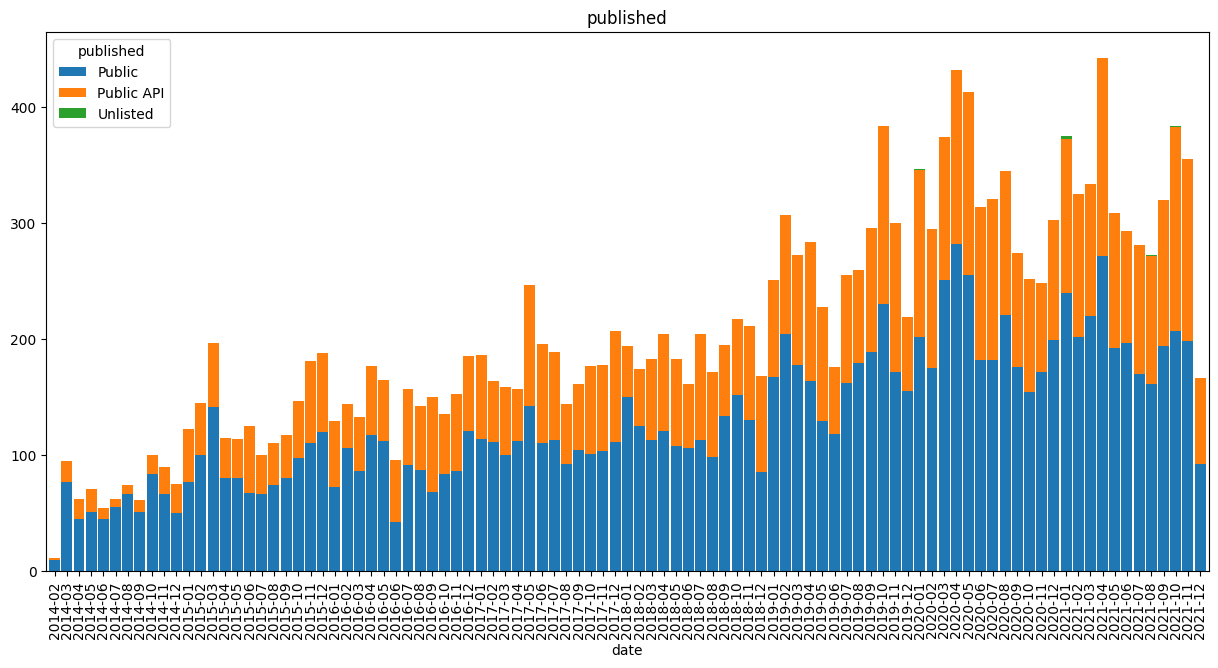

In [ ]:
plot_per_month("published", False)

<Axes: title={'center': 'test'}, xlabel='date'>

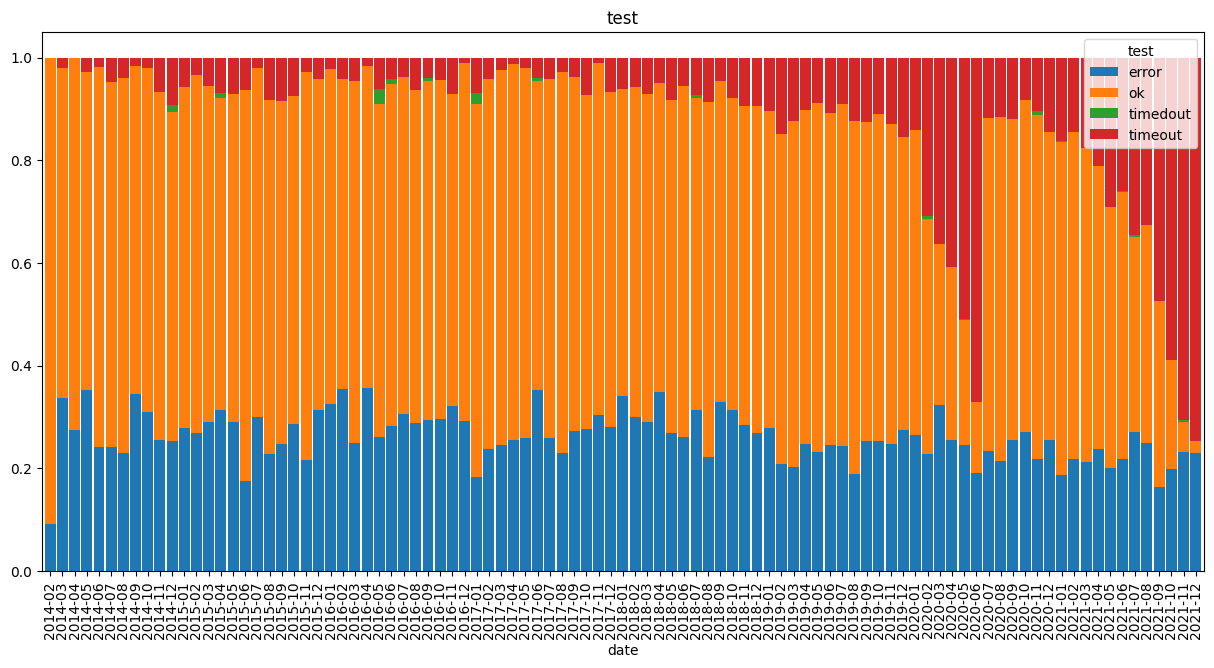

In [ ]:
# currently in development, another filtering step.
plot_per_month("test", stretched=True, legend=True)

In [ ]:
df["num_functions"] = df["functions"].apply(len)
df["num_functions"].describe()

count    19622.000000
mean         7.946234
std         10.261134
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        344.000000
Name: num_functions, dtype: float64

<Axes: title={'center': 'num_inputs'}, xlabel='date'>

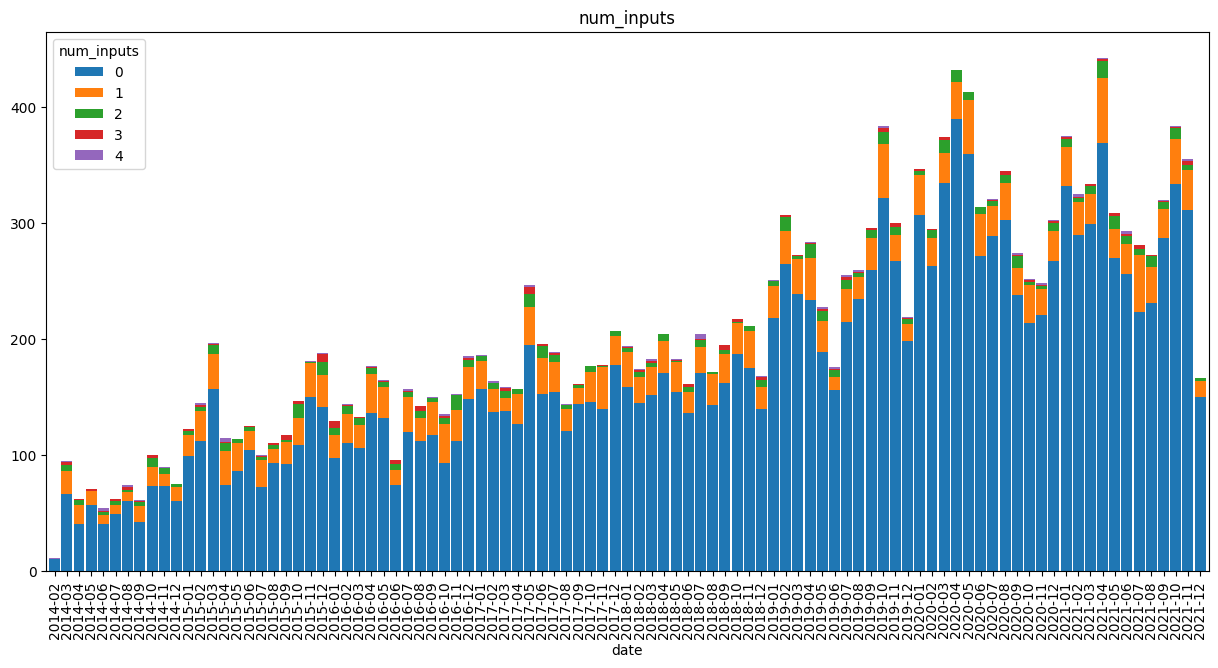

In [ ]:
df["num_inputs"] = df["image_inputs"].apply(len)
plot_per_month("num_inputs", stretched=False, legend=True)

In [ ]:
# these cases might be parsing failures? seem to always use macros inside functions or something.
# some use no functions but Main(){...} which seems to work in glsl but not viable for our dataset
from annotate import PARSER
print(PARSER.parse(bytes(df["image_code"][19616],encoding="utf-8")).root_node.has_error)
df.loc[df["num_functions"] == 0]

False


,id,name,author,description,tags,likes,viewed,published,date,time_retrieved,...,buffer_d_inputs,cube_a_code,cube_a_inputs,thumbnail,access,license,functions,test,num_functions,num_inputs
25,4s23Wc,pfhrector,pfhunk,80s vector graphics inspired kaliset,"[2d, fractal, kaliset]",7,791,Public,2014-03-11 02:44:55,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/4s23Wc...,shaders20k,CC-BY-NC-SA-3.0,[],ok,0,0
62,Md23DV,GLSL 2D Tutorials,vug,28 tutorials on writing pixel shaders at Shade...,[tutorial],581,48910,Public,2014-03-08 20:58:49,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/Md23DV...,shaders20k,CC-BY-NC-SA-3.0,[],error,0,3
424,XsSSRz,Tiny Ray Marcher 3.0,Aaro,Oh its on. I'm sure comment section will be fu...,"[reflection, ray, shadow, marching, tiny]",4,267,Public,2014-08-15 14:12:07,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/XsSSRz...,shaders20k,CC-BY-NC-SA-3.0,[],ok,0,0
565,Ms2XWw,Twist Scroller,ac3t1ne,Greetz!,"[2d, retro, amiga, ac3t1ne, scroller]",14,966,Public,2014-10-10 18:41:28,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/Ms2XWw...,shaders20k,CC-BY-NC-SA-3.0,[],ok,0,0
613,ld2SW3,A Pattern Emerges,okro,Takes a few seconds.,[dots],1,141,Public,2014-11-23 05:04:25,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/ld2SW3...,shaders20k,CC-BY-NC-SA-3.0,[],ok,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19362,Nty3Ry,Plotting by dmc3105,dmc3105,my first shader,[math],1,94,Public API,2021-11-26 15:06:50,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/Nty3Ry...,shaders20k,CC-BY-NC-SA-3.0,[],timeout,0,0
19422,std3zl,Lava Blob,Moustave,o,[yayyy],2,25,Public,2021-11-10 18:04:19,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/std3zl...,shaders20k,CC-BY-NC-SA-3.0,[],error,0,0
19479,7t3SDM,Tetragrammaton,4eckme,https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%...,[tetragrammaton],26,1891,Public,2021-12-11 07:59:44,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/7t3SDM...,shaders20k,CC-BY-NC-SA-3.0,[],timeout,0,0
19606,stKGDc,tiny voxels,flockaroo,...originally done in twigl.app (266 chars the...,"[voxel, golfing, tinycode]",21,305,Public API,2021-12-02 21:22:22,2021-10-01,...,[],,[],https://www.shadertoy.com/media/shaders/stKGDc...,shaders20k,cc-by-nc-sa-3.0,[],timeout,0,0


In [ ]:
# TODO: refactor into a generator because I dislike the current shape. but figure out how batching and threadding works then?
# part of the filter.py or prepare.py script that will be done soon.
def split_functions(batch):
    # per function fields
    comments, headers, docstrings, bodies = [],[],[],[]
    # per document fields
    full_code, funcs, ids, dates = [],[],[],[]
    for code, func_bytes, shader_id, shader_date in zip(batch["image_code"], batch["functions"], batch["id"], batch["date"]):
        row_code = bytes(code,encoding="utf-8")
        for start_comment, start_header, end_header, end_docstring, end_function in func_bytes:
            comments.append(row_code[start_comment:start_header].decode(encoding="utf-8")),
            headers.append(row_code[start_header:end_header].decode(encoding="utf-8")),
            docstrings.append(row_code[end_header:end_docstring].decode(encoding="utf-8")),
            bodies.append(row_code[end_docstring:end_function].decode(encoding="utf-8")),
            full_code.append(row_code.decode(encoding="utf-8")),
            funcs.append((start_comment, start_header, end_header, end_docstring, end_function))
            ids.append(shader_id)
            dates.append(shader_date)
    return {
            "comment": comments,
            "header": headers,
            "docstring": docstrings,
            "body": bodies,
            "full_code": full_code,
            "func_bytes": funcs,
            "id": ids,
            "date": dates,
            }


# func_ds = ds.map(split_functions, batched=True, remove_columns=ds["train"].column_names) # full dataset to functions
func_ds = filtered_ds.map(split_functions, batched=True, remove_columns=filtered_ds.column_names) # only permissive shaders (the whole 20k set is single pass without common...)
if "train" in func_ds:
    func_ds = func_ds["train"]
func_ds

Map:   0%|          | 0/3425 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'date', 'comment', 'header', 'docstring', 'body', 'full_code', 'func_bytes'],
    num_rows: 16600
})

In [ ]:
func_df = func_ds.to_pandas()
func_df["date"] = pd.to_datetime(func_ds["date"], unit="s") #didn't copy correctly?
func_df.head() 

C:\Users\Jan\AppData\Local\Temp\ipykernel_4256\1011214885.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  func_df["date"] = pd.to_datetime(func_ds["date"], unit="s") #didn't copy correctly?


,id,date,comment,header,docstring,body,full_code,func_bytes
0,XsS3DV,2014-02-28 22:11:31,,"vec2 center ( vec2 border , vec2 offset , vec2...",,\n\tvec2 c;\n\tif ( vel.x == 0.0 && vel.y == 0...,\nfloat k = 20.0;\nfloat field = 0.0;\nvec2 co...,"[49, 49, 103, 103, 506]"
1,XsS3DV,2014-02-28 22:11:31,,"void circle ( float r , vec3 col , vec2 offset...",,\n\tvec2 pos = coord.xy / iResolution.y;\n\tfl...,\nfloat k = 20.0;\nfloat field = 0.0;\nvec2 co...,"[508, 508, 569, 569, 797]"
2,XsS3DV,2014-02-28 22:11:31,,"vec3 band ( float shade, float low, float high...",,\n\n\tif ( (shade >= low) && (shade <= high) )...,\nfloat k = 20.0;\nfloat field = 0.0;\nvec2 co...,"[800, 800, 872, 872, 1067]"
3,XsS3DV,2014-02-28 22:11:31,,vec3 gradient ( float shade ) {,,\n\tvec3 colour = vec3( (sin(iTime/2.0)*0.25)+...,\nfloat k = 20.0;\nfloat field = 0.0;\nvec2 co...,"[1069, 1069, 1100, 1100, 1876]"
4,XsS3DV,2014-02-28 22:11:31,,"void mainImage( out vec4 fragColor, in vec2 fr...",,\n\n coord = fragCoord;\n \n\tcircle ( ....,\nfloat k = 20.0;\nfloat field = 0.0;\nvec2 co...,"[1878, 1878, 1935, 1935, 2619]"


In [ ]:
func_df["has_comment"] = func_df["comment"] != ""
func_df["has_docstring"] = func_df["docstring"] != ""
# func_df["model_ctx"] = func_df["comment"] + func_df["header"] + func_df["comment"]
# how many functions are there, and what is the share of comments, 

xtab = pd.crosstab(func_df["has_comment"], func_df["has_docstring"], margins=True)
print(f"functions with context = {xtab.iloc[-1,-1] - xtab.iloc[0,0]}")
xtab

# for the permissive subset of shaders 21k the number goes down to like 253 for both... and 150 for valid shaders only.

functions with context = 3822


has_docstring,False,True,All
has_comment,,,
False,12778,1152,13930
True,2341,329,2670
All,15119,1481,16600


In [ ]:
# FINDING: only about half the comments are unique.
# some frequent comment looks like a template maybe? should investigate
print(func_df["comment"].nunique())
func_df["comment"].value_counts(sort=True, ascending=False).head(10)

1941


comment
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                13930
//----------------------------------------------------------------------------------------\n//  3 out, 1 in...\n                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# FINDING = only about a third of function-headers are unique?
# it's expect to have one mainImage function per renderpass... but they are just whitesapce variable here - maybe we skip them in general
print(func_df["header"].nunique())
func_df["header"].value_counts(sort=True, ascending=False).head(10)

9110


header
void mainImage( out vec4 fragColor, in vec2 fragCoord )\n{    1979
void mainImage( out vec4 fragColor, in vec2 fragCoord ) {      175
void mainImage(out vec4 fragColor, in vec2 fragCoord) {        136
void mainImage(out vec4 fragColor, in vec2 fragCoord)\n{       127
void mainImage( out vec4 fragColor, in vec2 fragCoord ){       100
float sdBox( vec3 p, vec3 b )\n{                                60
vec3 calcNormal( in vec3 pos )\n{                               47
void mainImage( out vec4 O, vec2 U )\n{                         45
void mainImage( out vec4 O, vec2 u )\n{                         41
float map(vec3 p)\n{                                            37
Name: count, dtype: int64

In [ ]:
# looks like some are not exact or might even use the common pass to bypass this
func_df["header"].str.startswith("void mainImage").sum()

3224

In [ ]:
# half the docstrings aren't unique?
# most common one is the shadertoy.com/new default for the main function
print(func_df["docstring"].nunique())
func_df["docstring"].value_counts(sort=True, ascending=False).head(10)

947


docstring
                                                             15119
\n    // Normalized pixel coordinates (from 0 to 1)            268
\n    // Based on gluLookAt man page                            19
\n    //from David Hoskin's "Hash without sine"                 12
\n\n    // Precompute values for skewed triangular grid         10
\n    // normalized pixel coordinates                            9
\n    \n    //numerator /= (abs(denominator)+1.0);               8
\n    // filter kernel                                           8
 // in [0,1]                                                     6
\n    \n    // Normalized pixel coordinates (from 0 to 1)        6
Name: count, dtype: int64

In [ ]:
# indicator where the docstring is just something commented out - not helpful instructions.
func_df["docstring"].str.endswith(";").sum()

155

In [ ]:
# the comment is just a link to some website/reference? although sometimes it's a bunch of natural langauge too?
print(func_df["comment"].str.contains("https://").sum())
print(func_df["comment"].str.contains("www.").sum())

352
365


In [ ]:
# figure out if a function is needed, by removing if from body and check if the code still runs (you should have filtered for only working shaders before)

# step 1. subset the dataframe to only those rows that have comment and docstring
both_df = func_df[func_df["has_comment"] & func_df["has_docstring"]]
num_both= len(both_df)
print(f"{num_both=}")
# 253 functions form 168 shaders, only 179 of which are unique combinations...
both_df["header"].value_counts(sort=True, ascending=False).head(10)

num_both=329


header
mat3 viewMatrix(vec3 eye, vec3 center, vec3 up) {                                  17
vec3 hash31(float p)\n{                                                            16
void mainImage( out vec4 fragColor, in vec2 fragCoord )\n{                         15
vec2 hash22(vec2 p) {                                                               8
float noise3D(vec3 p){                                                              5
float calcSoftshadow( in vec3 ro, in vec3 rd, in float mint, in float tmax )\n{     4
float checkersGradBox( in vec2 p )\n{                                               4
float F ( in vec2 coords )\n{                                                       3
void mainImage(out vec4 fragColor, in vec2 fragCoord){                              3
float snoise(vec2 v) {                                                              3
Name: count, dtype: int64

In [ ]:
# this step can timeout/hang -.-
# step 2. if code runs without the function.
# takes ~1.4 minutes at home.
from annotate import run_shader

def check_function_needed(row):
    code = row["full_code"]
    start_comment, start_header, end_header, end_docstring, end_function = row["func_bytes"]
    test_code = code[:start_comment] + code[end_function:] #TODO: this needs to be done in bytes -.-
    status = run_shader(test_code)
    return status == "error"


both_df["needed"] = both_df.apply(check_function_needed, axis=1)
both_df["needed"].value_counts()

C:\Users\Jan\AppData\Local\Temp\ipykernel_4256\4188398997.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_df["needed"] = both_df.apply(check_function_needed, axis=1)


needed
True     318
False     11
Name: count, dtype: int64

In [ ]:
# down select the only the needed and working examples.
print(len(both_df))
both_df = both_df.loc[both_df["needed"]]
num_needed = len(both_df)
print(f"{num_needed=}")

329
num_needed=318


In [ ]:
from datasets import Dataset

both_df.loc[:,"input_both"] = both_df["comment"] + both_df["header"] + both_df["docstring"]
both_df.loc[:,"input_comment"] = both_df["comment"] + both_df["header"]
both_df.loc[:,"input_docstring"] = both_df["header"] + both_df["docstring"]
both_df.loc[:,"input_none"] = both_df["header"]
print(both_df.shape)
print(both_df["input_both"].nunique())
# remove the duplicates
both_df.drop_duplicates("input_both", inplace=True)
experiment_ds = Dataset.from_pandas(both_df)
experiment_ds

(318, 16)
257


Dataset({
    features: ['id', 'date', 'comment', 'header', 'docstring', 'body', 'full_code', 'func_bytes', 'has_comment', 'has_docstring', 'model_ctx', 'needed', 'input_both', 'input_comment', 'input_docstring', 'input_none', '__index_level_0__'],
    num_rows: 257
})

In [ ]:
# this pushes the dataset to the hub, uncomment with care!
# experiment_ds.push_to_hub("Vipitis/Shadereval-experiments-dev", private=False, commit_message="v0.2 filtered down to 257 examples, ensures working and Public+API")

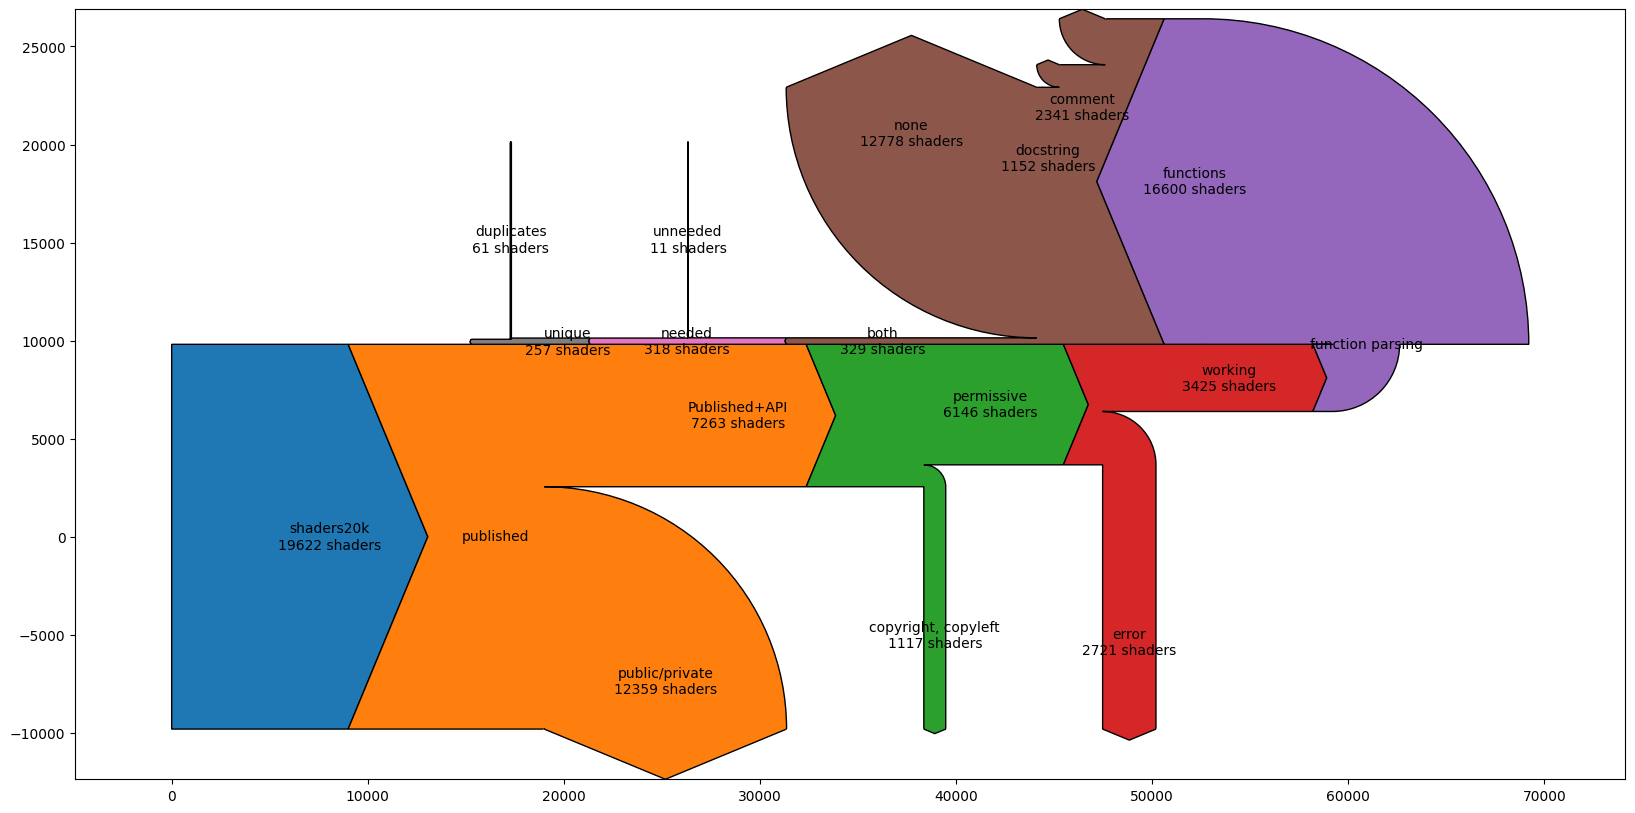

In [ ]:
# making a river plot (sankey diagram) of all out filtering steps
# keeping track of number of functions and then in backets (number of shader programs)
# filtering steps are in this order:
# 1. on shader programs: published, license, test,
# 2. on functions: comment+docstring, needed, deduplicate

program_filter_steps = [num_all, num_public_api, num_permissive, num_working]
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
plt.figure(figsize=(20,10))
plot = Sankey(head_angle=135, ax=plt.gca(), offset=-5000, unit=" shaders")
# easily add a secondary data source?
plot.add(flows=[-num_all], labels=["shaders20k"], pathlengths=[9000])
plot.add(flows=[num_all, -num_public_api, -(num_all-num_public_api)], patchlabel="published", labels=[None,"Published+API", "public/private"], pathlengths=[5000, 1000, 0], orientations=[0,0,-1], prior=0, connect=(0,0), trunklength=5000)
plot.add(flows=[num_public_api, -num_permissive, -(num_public_api-num_permissive)], labels=[None,"permissive", "copyright, copyleft"], pathlengths=[1000, 6000, (num_all-num_public_api)], orientations=[0,0,-1], prior=1, connect=(1,0), trunklength=5000)
plot.add(flows=[num_permissive, -num_working, -(num_permissive-num_working)], labels=[None, "working", "error"], pathlengths=[2000, 8000, (num_all-num_permissive)], orientations=[0,0,-1], prior=2, connect=(1,0))

# no we switch to function level
plot.add(flows=[num_working, -len(func_df)],prior=3, connect=(1,0),orientations=[1], patchlabel="function parsing", labels=[None, "functions"], pathlengths=[1000, 2000]) #need to change unit?
# add function with comment and docstring = 329
plot.add(flows=[len(func_df), -xtab.iloc[1,1], -xtab.iloc[0,0], -xtab.iloc[0,1], -xtab.iloc[1,0]],prior=4, connect=(1,0),orientations=[0,0,-1,-1,-1], labels=[None,"both", "none", "docstring","comment"], pathlengths=[3000, 0, 0, 0, 0])
# only needed functions = 318
plot.add(flows=[xtab.iloc[1,1], -318, -11],prior=5, connect=(1,0),orientations=[0, 0, -1], labels=[None,"needed", "unneeded"], pathlengths=[5000, 5000, 10000])
# deduplicated = 257
plot.add(flows=[318, -len(both_df), -(318-len(both_df))],prior=6, connect=(1,0),orientations=[0, 0, -1], labels=[None, "unique", "duplicates"], pathlengths=[4000, 2000, 10000])

# TODO: fancy this up - maybe figure out a scale
# TODO: refactor this all into a function or generator to make the syntax less horrible.
plot.finish()
plt.savefig("../Thesis/report/texs/charts/data_filtering.png")
plt.show()

<Axes: title={'center': 'unique_header'}, xlabel='date'>

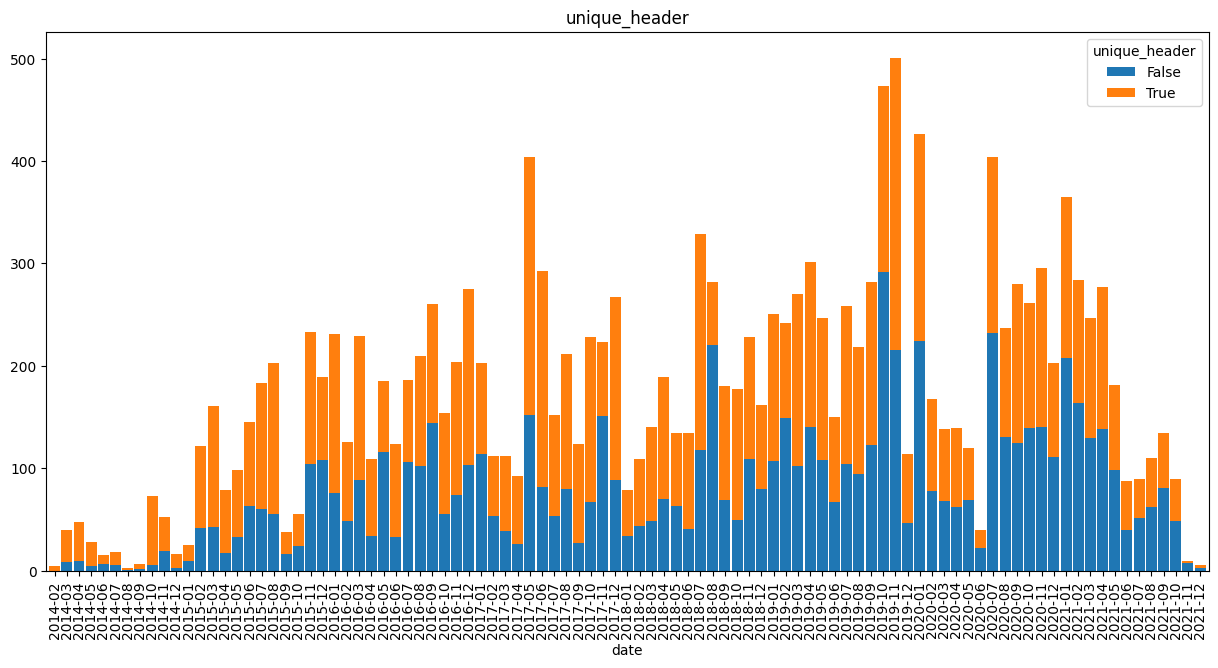

In [ ]:
# plot unique headers per month
# only looking at our "permissive" subset.
# tag every function as unique until it shows up twice (we use the header, iterate by time)
for i, row in tqdm(func_df.iterrows()):
    if func_df.loc[:i,"header"].eq(row["header"]).sum() > 1:
        func_df.at[i, "unique_header"] = False
    else:
        func_df.at[i, "unique_header"] = True

plot_per_month("unique_header", stretched=False, data=func_df, legend=True)

# Extension with API data

### only downloaded years 2020 till 2023 for now. It takes around 1 hour per year....

there is ~ 32k shaders on the API.
we need to apply a few extra filters and then join them with the above...

In [18]:
import os 
import jsonlines
import datasets
import pandas as pd


# awful code snippet pending https://github.com/huggingface/datasets/issues/7092 to use load_dataset instead (with both parts maybe).
api_files = os.listdir("./data/annotated/api")

api_files = [f"./data/annotated/api/{f}" for f in api_files]

api_file_contents = []
for f in api_files:
    with jsonlines.open(f) as reader:
        for obj in reader:
            api_file_contents.append(obj)

ds_api = datasets.Dataset.from_list(api_file_contents)

df_api = ds_api.to_pandas()

df_api["date"] = pd.to_datetime(df_api["date"].astype(int), unit="s")

num_all = len(df_api)
print(f"{num_all=}")

num_all=17383


In [19]:

# Filter 1: only shaders that are single pass (as in they don't have buffer passes etc)
# TODO: sound could be allowed, since it doesn't impact the image.

# TODO: maybe use common_code as that is trivially to combine?
print(f'number of shaders with common code={df_api.loc[df_api["common_code"] != ""].shape[0]}')
other_passes = [col for col in df_api.columns if col.endswith("_code") and col not in ("image_code")] #, "common_code", "souncd_code"

df_api = df_api[(df_api.loc[:,other_passes] == "").all(axis=1)]
num_single_pass = len(df_api)
print(f"{num_single_pass=}")


number of shaders with common code=4255
num_single_pass=11284


In [20]:
# Filter 2: only shaders that don't require inputs (for the image_pass which is left now)
# df_api["image_inputs"].apply(len).value_counts() # -> there is quite something
# TODO: maybe only some channel_types are bad... perhaps keep the ones we support (.complete)

df_api = df_api[df_api["image_inputs"].apply(len) == 0]
num_no_inputs = len(df_api)
print(f"{num_no_inputs=}")

num_no_inputs=8617


In [21]:
# Filter 3: overlap with the shaders20k data.
# we keep the "older" variant from the shaders20k dataset because that is static and won't change.

ids_20k = set(df["id"])

df_api = df_api[~df_api["id"].isin(ids_20k)]
num_new = len(df_api)
print(f"{num_new=}")

NameError: name 'df' is not defined

### combine and use similar filters as above...

In [1]:
# puttint it all together
import os
import jsonlines
import pandas as pd
import requests


def load_data(data_dir: os.PathLike) -> pd.DataFrame:
    lines = []
    for file in os.listdir(data_dir):
        if file.endswith(".jsonl"):
            with jsonlines.open(os.path.join(data_dir, file)) as reader:
                for obj in reader:
                    lines.append(obj)

    return pd.DataFrame(lines)


def filter_public_api(dataframe: pd.DataFrame, **kwargs) -> pd.DataFrame:
    """
    only keep shaders that are published to the API.
    """
    # TODO: Publish API shouldn't be in raw or annotated, this needs to be fixed in both datahalves.
    return dataframe[dataframe["published"].isin(["Public API", 3])]


def filter_licenses(dataframe: pd.DataFrame, keep_base=False, **kwargs) -> pd.DataFrame:
    """
    only keep permissive licenses.
    """
    permissive_list = requests.get("https://huggingface.co/datasets/bigcode-data/license_list/resolve/main/permissive_licenses.txt").content.decode("utf-8").split()
    permissive_list = [l.lower() for l in permissive_list]
    #TODO: figure out cases with AND and OR in the detection.
    if keep_base:
        permissive_list.append("CC-BY-NC-SA-3.0")
    return dataframe[dataframe["license"].isin(permissive_list)]


def filter_single_pass(dataframe: pd.DataFrame, **kwargs) -> pd.DataFrame:
    """
    only keep shaders that are single pass.
    """
    other_passes = [col for col in dataframe.columns if col.endswith("_code") and col not in ("image_code")]
    #TODO: consider keeping sound_code and common_code (the later one needs to be prepended to the image_code)
    return dataframe[(dataframe.loc[:,other_passes] == "").all(axis=1)]


def filter_no_inputs(dataframe: pd.DataFrame, **kwargs) -> pd.DataFrame:
    """
    only keep shaders that don't require inputs.
    to be used after you filtered for single pass shaders.
    """
    # TODO: consider keeping some channel_types
    return dataframe[dataframe["image_inputs"].apply(len) == 0]

#TODO: inspect if this is the case
def filter_words(dataframe: pd.DataFrame, words=["test", "bug"], **kwargs) -> pd.DataFrame:
    """
    Drop all shaders that contain works like "test", "debug", "ai", "chatGPT", in the title, description or tags.
    """
    for word in words:
        dataframe = dataframe[~dataframe["name"].str.contains(word, case=False)]
        dataframe = dataframe[~dataframe["description"].str.contains(word, case=False)]
        # dataframe = dataframe[~dataframe["tags"]" ".join().str.contains(word, case=False)] # can't do string opeerations on list of tags.

    return dataframe


def filter_working(dataframe: pd.DataFrame, untested=False, **kwargs) -> pd.DataFrame:
    """
    only keep shaders that are working.
    """

    # TODO: testing needs to really work before we can rely on this
    drop_values = ["error", "panic", "timeout", "timedout", "valid", "untested"]
    keep_values = ["ok"]
    if untested:
        drop_values.remove("untested")
        keep_values.append("untested")
    return dataframe[dataframe["test"].isin(keep_values)]

PROGRAM_FILTERS = [filter_public_api, filter_licenses, filter_single_pass, filter_no_inputs, filter_words, filter_working]

def filter_programs(dataframe: pd.DataFrame, filters=PROGRAM_FILTERS, **kwargs) -> pd.DataFrame:
    """
    apply a series of filters and print the resulting numbers
    kwargs are passed to the filters
    untested: keep untested shaders (default: False)
    keep_base: keep the base license (default: False)
    """
    print(len(dataframe))

    # TODO: add plotting into sankey?  when plot=True
    # plot = kwargs.pop("plot", None)
    # if plot is None:
        # import matplotlib.pyplot as plt
        # from matplotlib.sankey import Sankey
        # plt.figure(figsize=(20,10))
        # plot = Sankey(head_angle=135, ax=plt.gca(), offset=-5000, unit=" shader programs")
        # # easily add a secondary data source?
        # plot.add(flows=[-len(dataframe)], labels=["datasource"], pathlengths=[9000])


    for f in filters:
        dataframe = f(dataframe, **kwargs)
        print(f"{len(dataframe)} shaderprograms remaining after {f.__name__}")
    return dataframe


def combine_datasets(base_data, add_data):
    """
    combine two datasets, keeping the base data.
    """
    ids_base = set(base_data["id"])
    return pd.concat([base_data, add_data[~add_data["id"].isin(ids_base)]])


api_df = load_data("./data/annotated/api")
s20k_df = load_data("./data/annotated")
all_combined_df = combine_datasets(s20k_df, api_df) # make this early
print(f"all combined is {len(all_combined_df)} shaders")
api_df = filter_programs(api_df, untested=True, keep_base=False)
s20k_df = filter_programs(s20k_df, untested=True, keep_base=False)

combined_df = combine_datasets(s20k_df, api_df)
combined_df["date"] = pd.to_datetime(combined_df["date"].astype(int), unit="s")
print(len(combined_df))



8235
8235 shaderprograms remaining after filter_public_api
304 shaderprograms remaining after filter_licenses
225 shaderprograms remaining after filter_single_pass
167 shaderprograms remaining after filter_no_inputs
163 shaderprograms remaining after filter_words
150 shaderprograms remaining after filter_working
19622
7263 shaderprograms remaining after filter_public_api
408 shaderprograms remaining after filter_licenses
408 shaderprograms remaining after filter_single_pass
345 shaderprograms remaining after filter_no_inputs
330 shaderprograms remaining after filter_words
186 shaderprograms remaining after filter_working
336


In [2]:
# expand to functions and then do function filters
 
from annotate import run_shader
from tqdm import tqdm

tqdm.pandas()

def expand_functions(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    # TODO: likely redundant, since we keep everything... might need some cleanup instead
    cols_to_keep = ["id", "date", "image_code", "functions", "func_bytes", "author", "license"]
    #function byte indicies: start_comment, start_header, end_header, end_docstring, end_function
    func_parts = ["comment", "header", "docstring", "body"]

    # TODO: do we need the whole functions for anything downstream?
    dataframe["functions_"] = dataframe["functions"] # make a copy to keep it past explode
    func_df = dataframe.explode("functions")
    func_df.rename(columns={"functions": "func_bytes", "functions_": "functions"}, inplace=True)
    func_df.dropna(subset=["func_bytes"], inplace=True) # some shaders got not functions parsed ? -> TODO: check the tree-sitter.has_error() result?
    func_df.reset_index(inplace=True)
    for row_idx, row in func_df.iterrows():
        # print(row_idx, row)
        # break
        code = row["image_code"]
        code_bytes = bytes(code, encoding="utf-8")
        # func_bytes = row["func_bytes"]
        for idx, part in enumerate(func_parts):
            start = row["func_bytes"][idx]
            end = row["func_bytes"][idx+1]
            func_df.at[row_idx, part] = code_bytes[start:end].decode(encoding="utf-8")
        
    func_df.drop(columns=func_df.columns.difference(cols_to_keep + func_parts), inplace=True)
    # func_df["date"] = pd.to_datetime(func_df["date"].astype(int), unit="s")

    return func_df

def filter_has_context(dataframe: pd.DataFrame, context="comment", **kwargs) -> pd.DataFrame:
    """
    only keep functions that have a specific context. (not exclusive)
    context: one of "comment", "docstring", "both", "none"
    """
    # TODO: not all are implemented
    if context == "comment":
        return dataframe[dataframe["comment"] != ""]
    elif context == "docstring":
        return dataframe[dataframe["docstring"] != ""]
    elif context == "both":
        return dataframe[(dataframe["comment"] != "") & (dataframe["docstring"] != "")]
    elif context == "none":
        raise NotImplementedError(f"not implemented yet for context: {context}")
    else:
        raise ValueError(f"unknown context: {context}")

# TODO: combine construct_inp and filter_has_context into one function maybe?
def construct_inp(dataframe: pd.DataFrame, context="comment", **kwargs) -> pd.DataFrame:
    """
    adds the model_inp column based on the context.
    """
    if context == "comment":
        dataframe["model_inp"] = dataframe["comment"] + dataframe["header"]
    elif context == "docstring":
        dataframe["model_inp"] = dataframe["header"] + dataframe["docstring"]
    elif context == "both":
        dataframe["model_inp"] = dataframe["comment"] + dataframe["header"] + dataframe["docstring"]
    elif context == "none":
        dataframe["model_inp"] = dataframe["header"]
    else:
        raise ValueError(f"unknown context: {context}")
    return dataframe

def filter_length(dataframe: pd.DataFrame, max_length=2500, **kwargs) -> pd.DataFrame:
    """
    sort out function bodies that are really long. (likely machine generated)
    """
    # TODO: why chose this number?
    return dataframe[dataframe["body"].apply(len) <= max_length]

def filter_alphabetic(dataframe: pd.DataFrame, column="comment", cutoff=0.25, **kwargs) -> pd.DataFrame:
    """
    sort out functions that have an alphabetic ration above the cutoff.
    """
    return dataframe[dataframe[column].apply(lambda x: sum(c.isalpha() for c in x) / len(x)) > cutoff]

def filter_duplicates(dataframe: pd.DataFrame, sort_by="date", **kwargs) -> pd.DataFrame:
    """
    only keeps unique model_inp values. 
    sort_by specifies a column to sort by and keep the top value of. (default is "date")
    the sorting is not kept
    """
    if sort_by not in dataframe.columns:
        raise ValueError(f"unknown column to sort by: {sort_by}")
    dataframe.sort_values(by=sort_by, inplace=True)
    out_df = dataframe.drop_duplicates("model_inp")
    # undo the sort
    return out_df.sort_index()

def filter_needed(dataframe: pd.DataFrame, **kwargs) -> pd.DataFrame:
    """
    only keep functions that are needed. By running the shader with the function removed and seeing if it errors...
    """
    def row_needed(row):
        # print(row["id"])
        code_bytes = bytes(row["image_code"], encoding="utf-8")
        start_comment, start_header, end_header, end_docstring, end_function = row["func_bytes"]
        outer_bytes = code_bytes[:start_comment] + b"\n" +  code_bytes[end_function:]
        test_code = outer_bytes.decode(encoding="utf-8")
        status = run_shader(test_code)
        return status != "ok"
    dataframe["needed"] = dataframe.progress_apply(row_needed, axis=1)
    return dataframe[dataframe["needed"]]

FUNCTION_FILTERS = [filter_has_context, construct_inp, filter_length, filter_alphabetic, filter_duplicates, filter_needed]
def filter_functions(dataframe: pd.DataFrame, filters=FUNCTION_FILTERS, **kwargs) -> pd.DataFrame:
    """
    apply a series of filters and print the resulting numbers
    kwargs are passed to the filters
    """
    print(len(dataframe))

    for f in filters:
        dataframe = f(dataframe, **kwargs)
        print(f"{len(dataframe)} functions remaining after {f.__name__}")
    return dataframe

func_df = expand_functions(combined_df)
all_funcs = expand_functions(all_combined_df)
print(f"all functions from all uniuqe image passes: {len(all_funcs)}")
func_df = filter_functions(func_df, context="comment")

# func_df = expand_functions(combined_df)
# print(len(func_df))
# func_df = filter_has_context(func_df, context="comment")
# print(len(func_df))
# func_df = construct_inp(func_df, context="comment")
# print(len(func_df)) # shouldn't change
# func_df = filter_length(func_df)
# print(len(func_df))
# func_df = filter_duplicates(func_df)
# print(len(func_df))
# func_df = filter_needed(func_df) #this step takes nearly 3 minutes on my laptop! do we know if it ever hangs?
# print(len(func_df))
# func_df["body"].apply(len).describe()
# func_df["id"].value_counts()

C:\Users\Jan\AppData\Local\Temp\ipykernel_11584\2714249831.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["model_inp"] = dataframe["comment"] + dataframe["header"]


2232
581 functions remaining after filter_has_context
581 functions remaining after construct_inp
569 functions remaining after filter_length
554 functions remaining after filter_alphabetic
431 functions remaining after filter_duplicates


100%|██████████| 431/431 [02:42<00:00,  2.65it/s]

394 functions remaining after filter_needed


In [3]:
# inspection for length
# show the ids for the longest image_codes
func_df.sort_values("image_code", key=lambda x: x.str.len(), ascending=False).head(10)["id"]
# Stack v2 filters: 100k rows, https://github.com/go-enry/go-enry (is_generated), less than 25% of alphabetic characters, encoded, 
# https://www.shadertoy.com/view/NstGDM (contains a neural network in the code, don't want that)


# func_df["comment"].apply(len).describe(percentiles=[.5, .75, .9, .95, .99])

1629    NstGDM
173     4d33z4
164     4d33z4
172     4d33z4
175     4d33z4
176     4d33z4
179     4d33z4
180     4d33z4
165     4d33z4
206     Xs3GRM
Name: id, dtype: object

In [4]:
# check for the percentage of alphabetic characters in the whole code.
api_df[api_df["image_code"].apply(lambda x: sum(c.isalpha() for c in x) / len(x)) < .25][["id"]]#, "comment", "header"]]

,id
2229,NstGDM


In [5]:
# extract the shader_ids that are left in the end to run tests just on them.
# with open("data/ids/v0-3.txt", "w", encoding="utf-8") as f:
    # f.write("\n".join(func_df["id"].unique().tolist()))

In [6]:
print(func_df["id"].nunique()) # our 719 functions are just from 290 programs?
func_df["header"].str.split(" ").apply(lambda x: x[0]).value_counts()
# func_df["header"].str.startswith("void").sum()

172


header
float              195
vec3                98
vec2                48
vec4                30
void                 7
mat3                 4
v33                  3
bound3               2
tilingVal3D          2
cast_ray_result      1
bool                 1
hexParams            1
ivec2                1
ivec3                1
Name: count, dtype: int64

In [3]:
# some temporary columns
all_funcs["function"] = all_funcs["header"] + all_funcs["body"]
func_df["function"] = func_df["header"] + func_df["body"]
func_df["function_frequency"] = all_funcs["function"].value_counts()[func_df["function"]].values
func_df

,id,author,date,image_code,license,func_bytes,functions,comment,header,docstring,body,model_inp,needed,function,function_frequency
15,lsfXWH,iq,2014-05-15 00:14:43,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[3256, 3289, 3316, 3316, 3347]","[[1978, 2039, 2083, 2083, 3254], [3256, 3289, ...",// unrolled version of the above\n,float SH_0_0( in vec3 s ) {,,vec3 n = s.zxy; return k01; },// unrolled version of the above\nfloat SH_0_0...,True,float SH_0_0( in vec3 s ) { vec3 n = s.zxy; re...,3
35,4ssSRl,iq,2014-07-18 08:21:44,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[0, 1196, 1243, 1243, 1363]","[[0, 1196, 1243, 1243, 1363], [1365, 1365, 142...",// The MIT License\n// Copyright © 2014 Inigo ...,"float line( in vec2 a, in vec2 b, in vec2 p )\n{",,\n\tvec2 pa = p - a;\n\tvec2 ba = b - a;\n\tfl...,// The MIT License\n// Copyright © 2014 Inigo ...,True,"float line( in vec2 a, in vec2 b, in vec2 p )\...",3
37,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1272, 1348, 1388, 1388, 1443]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Flip v if in the negative half plane define...,"vec2 flipIfNeg( in vec2 v, in vec2 r )\n{",,"\n float k = dot(v,r);\n return (k>0.0) ...",// Flip v if in the negative half plane define...,True,"vec2 flipIfNeg( in vec2 v, in vec2 r )\n{\n ...",1
38,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1445, 1524, 1564, 1564, 1626]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Reflect v if in the negative half plane def...,"vec2 reflIfNeg( in vec2 v, in vec2 r )\n{",,"\n float k = dot(v,r);\n return (k>0.0) ...",// Reflect v if in the negative half plane def...,True,"vec2 reflIfNeg( in vec2 v, in vec2 r )\n{\n ...",1
39,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1628, 1704, 1744, 1744, 1834]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Clip v if in the negative half plane define...,"vec2 clipIfNeg( in vec2 v, in vec2 r )\n{",,"\n float k = dot(v,r);\n return (k>0.0) ...",// Clip v if in the negative half plane define...,True,"vec2 clipIfNeg( in vec2 v, in vec2 r )\n{\n ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[4801, 4870, 4894, 4894, 5105]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...",// Pretty self explanatory FBM with some preci...,float cloudsFBM(vec3 p){,,\n float a = 0.0;\n float w = 0.5;\n ...,// Pretty self explanatory FBM with some preci...,True,float cloudsFBM(vec3 p){\n float a = 0.0;\n...,1
2224,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[5221, 5393, 5424, 5424, 6194]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...",// this function probes the clouds densite at ...,vec2 cloudsDensity3D(vec3 pos){,,\n float h = getHeightOverSurface(pos);\n ...,// this function probes the clouds densite at ...,True,vec2 cloudsDensity3D(vec3 pos){\n float h =...,1
2226,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[7849, 8201, 8257, 8257, 8618]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...","// very native rendering for the ground, shado...","vec3 renderGround(vec3 point, float dist, floa...",,\n float shadow = raymarchClouds(\n ...,"// very native rendering for the ground, shado...",True,"vec3 renderGround(vec3 point, float dist, floa...",1
2227,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[8625, 8713, 8806, 8806, 9094]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...","// Straightforward, render raymarch, apply fog...","vec3 renderClouds(vec3 pointStart, vec3 pointE...",,\n vec4 clouds = raymarchClouds(\n ...,"// Straightforward, render raymarch, apply fog...",True,"vec3 renderClouds(vec3 pointStart, vec3 pointE...",1


In [4]:
# drop some columns we don't need in the dataset
clean_func_df = func_df.drop(columns=["function", "docstring", "needed"])
clean_func_df

,id,author,date,image_code,license,func_bytes,functions,comment,header,body,model_inp,function_frequency
15,lsfXWH,iq,2014-05-15 00:14:43,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[3256, 3289, 3316, 3316, 3347]","[[1978, 2039, 2083, 2083, 3254], [3256, 3289, ...",// unrolled version of the above\n,float SH_0_0( in vec3 s ) {,vec3 n = s.zxy; return k01; },// unrolled version of the above\nfloat SH_0_0...,3
35,4ssSRl,iq,2014-07-18 08:21:44,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[0, 1196, 1243, 1243, 1363]","[[0, 1196, 1243, 1243, 1363], [1365, 1365, 142...",// The MIT License\n// Copyright © 2014 Inigo ...,"float line( in vec2 a, in vec2 b, in vec2 p )\n{",\n\tvec2 pa = p - a;\n\tvec2 ba = b - a;\n\tfl...,// The MIT License\n// Copyright © 2014 Inigo ...,3
37,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1272, 1348, 1388, 1388, 1443]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Flip v if in the negative half plane define...,"vec2 flipIfNeg( in vec2 v, in vec2 r )\n{","\n float k = dot(v,r);\n return (k>0.0) ...",// Flip v if in the negative half plane define...,1
38,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1445, 1524, 1564, 1564, 1626]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Reflect v if in the negative half plane def...,"vec2 reflIfNeg( in vec2 v, in vec2 r )\n{","\n float k = dot(v,r);\n return (k>0.0) ...",// Reflect v if in the negative half plane def...,1
39,4dBXz3,iq,2014-10-24 08:55:07,// The MIT License\n// Copyright © 2014 Inigo ...,mit,"[1628, 1704, 1744, 1744, 1834]","[[1272, 1348, 1388, 1388, 1443], [1445, 1524, ...",// Clip v if in the negative half plane define...,"vec2 clipIfNeg( in vec2 v, in vec2 r )\n{","\n float k = dot(v,r);\n return (k>0.0) ...",// Clip v if in the negative half plane define...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2222,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[4801, 4870, 4894, 4894, 5105]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...",// Pretty self explanatory FBM with some preci...,float cloudsFBM(vec3 p){,\n float a = 0.0;\n float w = 0.5;\n ...,// Pretty self explanatory FBM with some preci...,1
2224,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[5221, 5393, 5424, 5424, 6194]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...",// this function probes the clouds densite at ...,vec2 cloudsDensity3D(vec3 pos){,\n float h = getHeightOverSurface(pos);\n ...,// this function probes the clouds densite at ...,1
2226,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[7849, 8201, 8257, 8257, 8618]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...","// very native rendering for the ground, shado...","vec3 renderGround(vec3 point, float dist, floa...",\n float shadow = raymarchClouds(\n ...,"// very native rendering for the ground, shado...",1
2227,clKfWm,afl_ext,2023-12-09 21:45:07,// afl_ext 2017-2023\n// MIT License\n\n// Use...,mit,"[8625, 8713, 8806, 8806, 9094]","[[993, 1070, 1130, 1130, 1523], [1525, 1592, 1...","// Straightforward, render raymarch, apply fog...","vec3 renderClouds(vec3 pointStart, vec3 pointE...",\n vec4 clouds = raymarchClouds(\n ...,"// Straightforward, render raymarch, apply fog...",1


In [25]:
# maybe something to show which kind of shaders are easy/simple?
# the common tags in our dataset are 2d (73 out of 394), sdf (61), 3d (47), distance (39) etc?
# according to the full dataset, our filters have blindspots in "fractal", "raymarching", "noise", "procedural"
from collections import Counter
print("all:", end="")
all_tags = []
for t in all_combined_df["tags"]:
    all_tags.extend(t)
print(len(all_tags))
tag_counts = Counter(all_tags)
print(tag_counts.most_common(10))
print("eval:", end="")
eval_ids = func_df["id"].tolist()
all_tags = []
for t in all_combined_df[all_combined_df["id"].isin(eval_ids)]["tags"]:
    all_tags.extend(t)
print(len(all_tags))
tag_counts = Counter(all_tags)
print(tag_counts.most_common(10))

all:74853
[('2d', 3356), ('raymarching', 2981), ('fractal', 1821), ('3d', 1786), ('noise', 1267), ('sdf', 1071), ('raymarch', 741), ('procedural', 649), ('short', 507), ('voronoi', 469)]
eval:757
[('2d', 73), ('sdf', 61), ('3d', 47), ('distance', 39), ('distancefield', 37), ('gradient', 25), ('procedural', 11), ('raymarching', 11), ('analytic', 10), ('noise', 8)]


In [29]:
# publishing the v0.3 version with context="comment" and all the filters.
from datasets import Dataset
func_ds = Dataset.from_pandas(clean_func_df)
func_ds = func_ds.remove_columns(['__index_level_0__'])
func_ds
# func_ds.push_to_hub("Vipitis/Shadereval-experiments-dev", commit_message="add function_frequency", private=False, split="test") # don't easily uncomment again...

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Vipitis/Shadereval-experiments-dev/commit/2d7c4164998152b96c6da14f197ff47f646e4aef', commit_message='add function_frequency', commit_description='', oid='2d7c4164998152b96c6da14f197ff47f646e4aef', pr_url=None, pr_revision=None, pr_num=None)

In [7]:
print(func_df["author"].nunique())
func_df["license"].value_counts()

49


license
mit          256
cc0-1.0      123
cc-by-4.0      9
libpng         5
isc            1
Name: count, dtype: int64

In [8]:
plot_per_month("license", stretched=False, data=combined_df, legend=True)

NameError: name 'plot_per_month' is not defined

<Axes: title={'center': 'license'}, xlabel='date'>

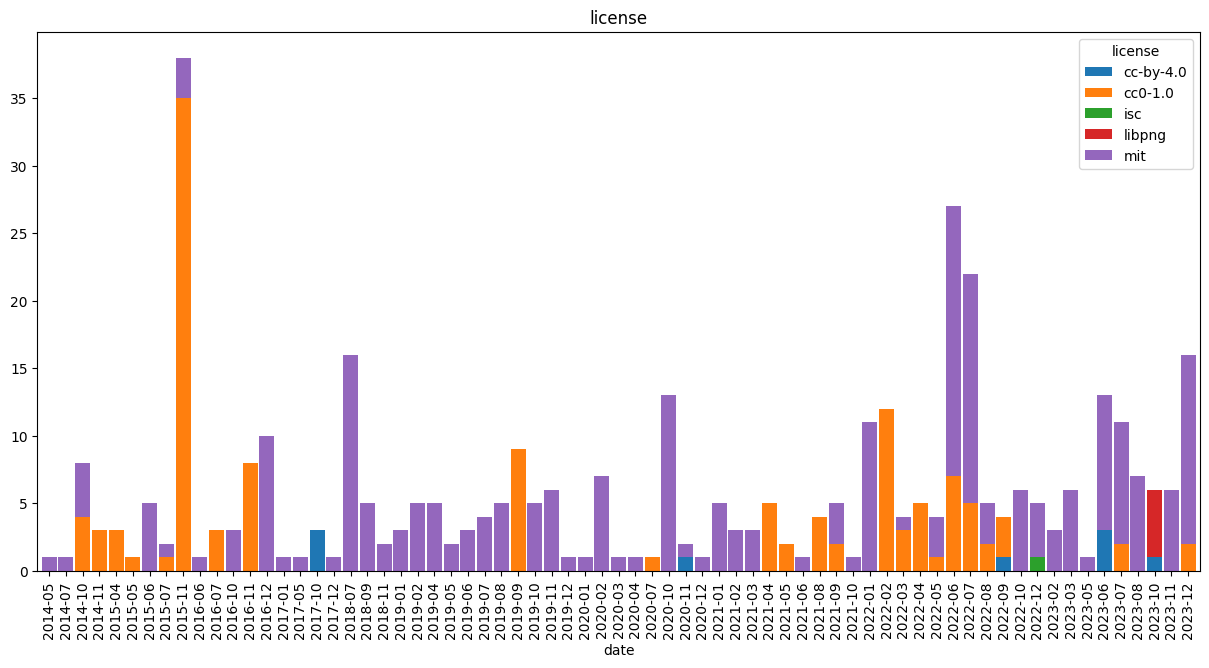

In [ ]:
# this is skewed due to duplicates -.-
plot_per_month("license", stretched=False, data=func_df, legend=True)

In [33]:
from datasets import load_dataset, disable_caching
# disable_caching()
ref_ds = load_dataset("Vipitis/Shadereval-experiments-dev", revision="main", split="test")# , download_mode="force_redownload") #might be revision="0.3" eventually.
ref_ds

Dataset({
    features: ['id', 'author', 'date', 'image_code', 'license', 'func_bytes', 'functions', 'comment', 'header', 'body', 'model_inp', 'function_frequency'],
    num_rows: 394
})

In [34]:
for row in ref_ds:
    print(row)
    break

{'id': 'lsfXWH', 'author': 'iq', 'date': Timestamp('2014-05-15 00:14:43'), 'image_code': '// The MIT License\n// Copyright © 2014 Inigo Quilez\n// Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHE

In [68]:
# all_funcs["id"].nunique() # 27428 shaders/programs
# all_funcs["header"].nunique() # 78256 unique headers
# all_funcs["body"].nunique() # 130948 unique bodies
all_funcs["function"] = all_funcs["header"] + all_funcs["body"]
all_funcs["function"].nunique() # 137308 unique functions

all_funcs["function"].value_counts().head(20)

function
float SmoothBump (float lo, float hi, float w, float x)\n{\n  return (1. - smoothstep (hi - w, hi + w, x)) * smoothstep (lo - w, lo + w, x);\n}                                                                                                                  277
float PrCylDf (vec3 p, float r, float h)\n{\n  return max (length (p.xy) - r, abs (p.z) - h);\n}                                                                                                                                                                 265
vec2 Rot2D (vec2 q, float a)\n{\n  vec2 cs;\n  cs = sin (a + vec2 (0.5 * pi, 0.));\n  return vec2 (dot (q, vec2 (cs.x, - cs.y)), dot (q.yx, cs));\n}                                                                                                             259
float Noisefv2 (vec2 p)\n{\n  vec2 t, ip, fp;\n  ip = floor (p);  \n  fp = fract (p);\n  fp = fp * fp * (3. - 2. * fp);\n  t = mix (Hashv2v2 (ip), Hashv2v2 (ip + vec2 (0., 1.)), fp.y);\n  return mix (t.x, t.y

<Axes: xlabel='function'>

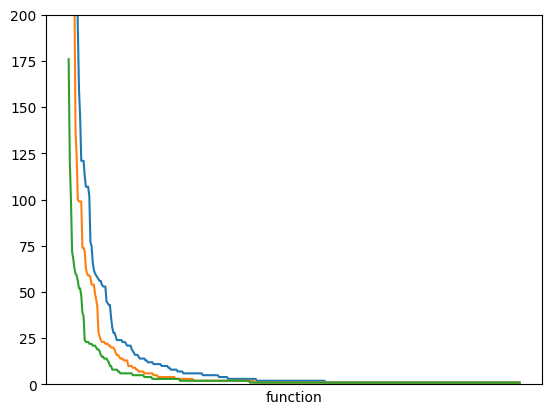

In [41]:
# function/header frequency in the eval set.
all_funcs["header"].value_counts()[func_df["header"]].sort_values(ascending=False).plot(ylim=(0,200), xticks=[]) 
all_funcs["body"].value_counts()[func_df["body"]].sort_values(ascending=False).plot(xticks=[])
all_funcs["function"].value_counts()[func_df["function"]].sort_values(ascending=False).plot(xticks=[])